In [1]:
from langchain_mistralai.chat_models import ChatMistralAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
#state definition
class BMI(TypedDict):
    weight:float
    height:float
    bmi:float
    status:str

In [3]:
model=ChatMistralAI(api_key=os.getenv('mistral_ai'))

In [4]:
def calculate_bmi(state:BMI)->BMI:
    weight=state['weight']
    height=state['height']
    bmi=round(weight/(height**2),2) 
    state['bmi']=bmi
    return state


def judgment(state:BMI)->BMI:
    bmi=state['bmi']
    if bmi<18.5:
        state['status']='underweight'
    elif 18.5<=bmi<25:
        state['status']='normal'
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state


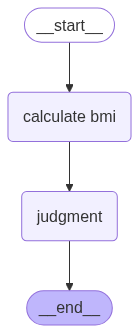

In [5]:
#define ur graph

graph=StateGraph(BMI)

#add nodes and edges
graph.add_node('calculate bmi',calculate_bmi)
graph.add_node('judgment',judgment)

#add edges

graph.add_edge(START,'calculate bmi')
graph.add_edge('judgment',END)
graph.add_edge('calculate bmi','judgment')

#compile
 
workflow=graph.compile()

workflow


In [6]:
input_state={'weight':75,'height':5.10}

result=workflow.invoke(input_state)
result

{'weight': 75, 'height': 5.1, 'bmi': 2.88, 'status': 'underweight'}